# LAURA VALENTINA RODRÍGUEZ ORTEGÓN

## Exercise: Compute the Matrix for a Deutsch Algorithm Function

The Deutsch algorithm is a fundamental quantum algorithm for determining if a given binary function is constant or balanced. In this exercise, you'll be working with one of the possible functions that can be used in the Deutsch algorithm. Your task is to compute the matrix representation of this function and deduce its implementation.

### Background

The Deutsch algorithm deals with functions of the form $f: \{0,1\} \rightarrow \{0,1\}$. There are four possible functions that $f$ can represent:

1. **Constant Zero Function**: $f(0) = 0$ and $f(1) = 0$
2. **Constant One Function**: $f(0) = 1$ and $f(1) = 1$
3. **Balanced Identity Function**: $f(0) = 0$ and $f(1) = 1$
4. **Balanced NOT Function**: $f(0) = 1$ and $f(1) = 0$

### Task

Your task is to compute the matrix representation for the Balanced NOT Function,
$f(x)$, where $f(0) = 1$ and $f(1) = 0$, then use this matrix to deduce the
implementation of the function in terms of quantum gates, and finally simulate
the solution in Python and in IBM's quantum computer

#### Steps:

1. **Matrix Representation**:
   - Determine the matrix representation of the Balanced NOT Function for the Deutsch algorithm. Remember that the function is applied to the qubit in superposition, so consider how the NOT operation affects the basis states $\vert0\rangle$ and $\vert1\rangle$.

2. **Implementation Deduction**:
   - Based on the matrix you've computed, deduce which quantum gates can be used
     to implement the Balanced NOT Function. Consider the effects of standard
     quantum gates (such as X, H, etc.) on the basis states and how they can be
     combined to replicate the function's behavior.
   
3. **Implementation in IBM's QC**:
   - Implemente the experiment for the four functions in IBM's QC.

### Submission Requirements

- **Matrix Computation**: Provide the 2x2 matrix representing the Balanced NOT Function.
- **Gate Implementation**: Describe the sequence of quantum gates that could
  implement this function, including any necessary initial state preparation and
  final measurements.
- **Implementation in IBM's QC**: Show the implementation of the algorithm and
  the graph-bar representation of the output.
- **Explanation**: Briefly explain your reasoning for both the matrix computation and the gate implementation.

### Hints

- Remember that the matrix for a quantum gate operation must reflect how it transforms the standard basis states.
- The Hadamard (H) gate plays a crucial role in creating superpositions necessary for the Deutsch algorithm.
- The NOT operation in quantum computing can be realized using the X gate.

### Evaluation Criteria

- **Accuracy**: Correctness of the matrix representation and quantum gate implementation.
- **Clarity**: Clear and logical explanation of the steps taken to arrive at the solution.
- **Creativity**: Efficient use of quantum gates to achieve the desired function implementation.

Good luck with your task, and remember to approach it step-by-step. This exercise will help you better understand the workings of the Deutsch algorithm and the use of quantum gates in implementing specific functions.


## Solución
#### Steps:

1. **Matrix Representation**:
   - Determine the matrix representation of the Balanced NOT Function for the Deutsch algorithm. Remember that the function is applied to the qubit in superposition, so consider how the NOT operation affects the basis states $\vert0\rangle$ and $\vert1\rangle$.
  
La función NOT balanceada, para f(0)=1 y f(1)=0

La función es:

            | 0 1 |
            | 1 0 |

Esto es porque para la primera fila representa el estado para la base |0>, para f(0) = 1 entonces es la inversa de |0> es |1>
Y de igual forma para la siguiente fila donde f(1) = 0, se le realiza la inversa, para un solo quit



2. **Implementation Deduction**:
   - Based on the matrix you've computed, deduce which quantum gates can be used
     to implement the Balanced NOT Function. Consider the effects of standard
     quantum gates (such as X, H, etc.) on the basis states and how they can be
     combined to replicate the function's behavior.

Dado que ya hemos calculado la matriz de la función NOT equilibrada, podemos deducir que la puerta cuántica X es la única puerta necesaria para implementar esta función. La puerta X (NOT) cambiará el estado del qubit de ∣0⟩ a ∣1⟩ y viceversa.


In [6]:
#Punto 2
import cirq

class QuantumCircuit:
    def __init__(self):
        self.qc = cirq.Circuit()
        self.qubit = cirq.GridQubit(0, 0)

    def add_gate(self, gate):
        self.qc.append(gate)

    def measure_qubit(self):
        self.qc.append(cirq.measure(self.qubit, key='result'))

    def run_simulation(self, repetitions=1000):
        print("Circuito cuántico:")
        print(self.qc)
        simulator = cirq.Simulator()
        result = simulator.run(self.qc, repetitions=repetitions)
        counts = result.histogram(key='result')
        print("Resultados de la simulación:", counts)

qc = QuantumCircuit()
qc.add_gate(cirq.X(qc.qubit))
qc.measure_qubit()
qc.run_simulation(repetitions=1000)


Circuito cuántico:
(0, 0): ───X───M('result')───
Resultados de la simulación: Counter({1: 1000})



3. **Implementation in IBM's QC**:
   - Implemente the experiment for the four functions in IBM's QC.
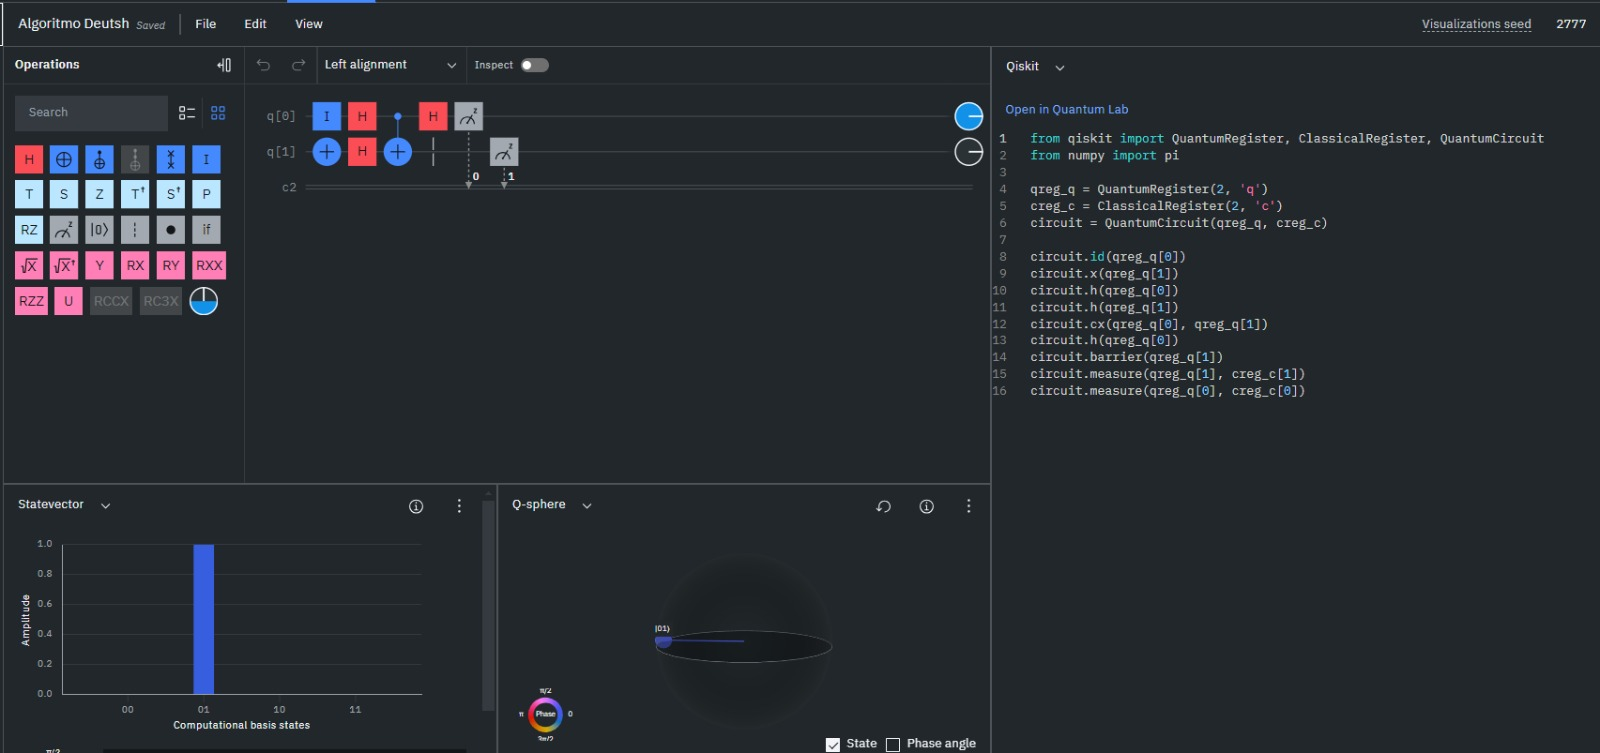


In [7]:
# Codigo del IBM (Imagen 1)
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.id(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

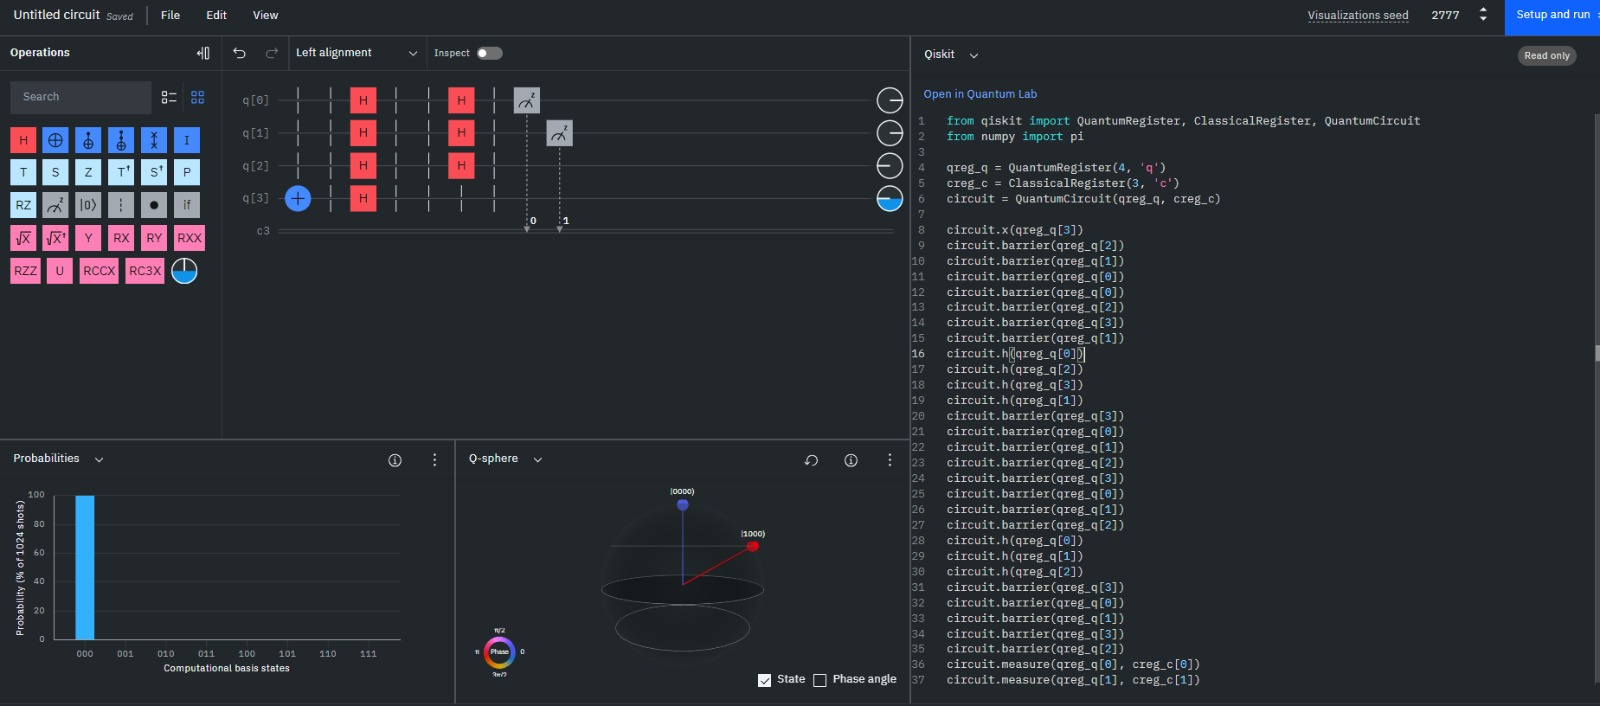


In [ ]:
# Codigo del IBM (Imagen 2)
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.x(qreg_q[3])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[1])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[0])
circuit.barrier(qreg_q[1])
circuit.barrier(qreg_q[3])
circuit.barrier(qreg_q[2])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

# Exercise: Compute the Matrix for a Balanced Function in the Deutsch-Jozsa Algorithm

The Deutsch-Jozsa algorithm is a cornerstone of quantum computing, demonstrating an exponential speedup over classical algorithms for a specific problem set. This exercise focuses on understanding and implementing a balanced function suitable for the Deutsch-Jozsa algorithm. You will compute the matrix representation of this function and deduce its quantum circuit implementation.

## Background

The Deutsch-Jozsa algorithm distinguishes whether a given function $f: \{0,1\}^n \rightarrow \{0,1\}$ is constant (all outputs the same) or balanced (half of the outputs are 0 and half are 1) with a single quantum query. 

## Task

Choose a balanced function for a 3-qubit system ($n=3$), where the function is defined as balanced if for its eight possible inputs, it produces four 0s and four 1s as output. Compute the matrix representation of this function and deduce the sequence of quantum gates needed to implement it.

### Steps

1. **Function Selection**:
   - Define one constant and two balanced function $f: \{0,1\}^3 \rightarrow
     \{0,1\}$ that you will use for this exercise. An example of a balanced
     function might be a
     function that outputs 1 for inputs $00X$ and $11X$, and 0 for inputs $01X$
     and $10X$.

2. **Matrix Representation**:
   - Calculate the 16x16 unitary matrix that represents $U_f$ for each function on the input states. 

3. **Implementation Deduction**:
   - Based on the computed matrix, determine the sequence of quantum gates that can implement these functions. Your solution should detail the gates used, their order, and how they interact with the qubits to realize the functions.

### Submission Requirements

- **Function Selection**: Clearly state the functions you have chosen to analyze.
- **Matrix Computation**: Provide the matrix that represents the chosen functions.
- **Gate Implementation**: Outline a quantum circuit diagram or describe in
  detail the sequence of quantum gates that implements the chosen function.
- **Simulate the algorithm in Python**: Simulate the execution of the algorithm
  in Python for each function.  
- **Implementation in IBM's QC**: Show the implementation of the algorithm and
  the graph-bar representation of the output.
- **Explanation**: Offer a concise explanation for your approach to defining the function, computing the matrix, and designing the gate implementation.

### Hints

- The Hadamard (H) gate is useful for creating superposition states in the initial step of the Deutsch-Jozsa algorithm.
- The Controlled-NOT (CNOT) gate and other multi-qubit gates may be necessary for implementing balanced functions.
- Remember, the matrix for the quantum operation must be unitary, ensuring the total probability remains 1.

### Evaluation Criteria

- **Accuracy**: The correctness of the matrix representation and the quantum gate sequence.
- **Clarity**: How well the selection process, calculations, and implementation are explained.
- **Creativity**: The efficiency and innovation shown in utilizing quantum gates to replicate the function's behavior.

By completing this exercise, you will gain valuable insights into the operational principles of the Deutsch-Jozsa algorithm and enhance your skills in quantum circuit design.

## Solución

### Steps

1. **Function Selection**:
   - Define one constant and two balanced function $f: \{0,1\}^3 \rightarrow
     \{0,1\}$ that you will use for this exercise. An example of a balanced
     function might be a
     function that outputs 1 for inputs $00X$ and $11X$, and 0 for inputs $01X$
     and $10X$.
Función de cero constante f(x) = 0
Función de identidad equilibrada f(x) = X
Función NO equilibrada f(x) = -x
2. **Matrix Representation**:
   - Calculate the 16x16 unitary matrix that represents $U_f$ for each function on the input states. 

Las matrices que representan las tres funciones con el sistema de quibts: 

FUNCIÓN CERO CONSTANTE: 
a. f(000) = 0, f(001) = 0, f(010) = 0, f(011) = 0
b. f(100) = 0, f(101) = 0, f(110) = 0, f(111) = 0
    La representación matricial será la matriz identidad de 8x8 multiplicada por 0

FUNCIÓN DE IDENTIDAD EQUILIBRADA: 
a. f(000) = 0, f(001) = 1, f(010) = 10, f(011) = 11
b. f(100) = 100, f(101) = 101, f(110) = 100, f(111) = 111
    La representación matricial será la matriz identidad de 8x8

FUNCIÓN NO EQUILIBRADA: 
a. f(000) = 1, f(001) = 0, f(010) = 11, f(011) = 10
b. f(100) = 101, f(101) = 100, f(110) = 111, f(111) = 110
    La representación matricial será la puerta NOT de 8x8 aplicada a cada entrada


In [11]:
import numpy as np

num_qubits = 3
num_states = 2 ** num_qubits

def constant_zero_function(x):
    return '000'

def balanced_identity_function(x):
    return x

def balanced_not_function(x):
    output = ''
    for bit in x:
        if bit == '0':
            output += '1'
        else:
            output += '0'
    return output

def compute_matrix_representation(func):
    matrix = np.zeros((num_states, num_states), dtype=int)
    for i in range(num_states):
        input_state = np.binary_repr(i, width=num_qubits)
        output_state = func(input_state)
        output_index = int(output_state, 2)
        matrix[i, output_index] = 1
    return matrix

constant_zero_matrix = compute_matrix_representation(constant_zero_function)
balanced_identity_matrix = compute_matrix_representation(balanced_identity_function)
balanced_not_matrix = compute_matrix_representation(balanced_not_function)

print("Matrix Representation for Constant Zero Function:")
print(constant_zero_matrix)
print()

print("Matrix Representation for Balanced Identity Function:")
print(balanced_identity_matrix)
print()

print("Matrix Representation for Balanced NOT Function:")
print(balanced_not_matrix)



Matrix Representation for Constant Zero Function:
[[1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]

Matrix Representation for Balanced Identity Function:
[[1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1]]

Matrix Representation for Balanced NOT Function:
[[0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0]
 [0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0]]



3. **Implementation Deduction**:
   - Based on the computed matrix, determine the sequence of quantum gates that can implement these functions. Your solution should detail the gates used, their order, and how they interact with the qubits to realize the functions.

Deduciremos las secuencias de puertas cuánticas necesarias para implementar estas funciones en función de sus representaciones matriciales. Esto implicará el uso de puertas apropiadas de un solo qubit y de múltiples qubits, como Hadamard (H), Controlled-NOT (CNOT) y otras, según sea necesario.
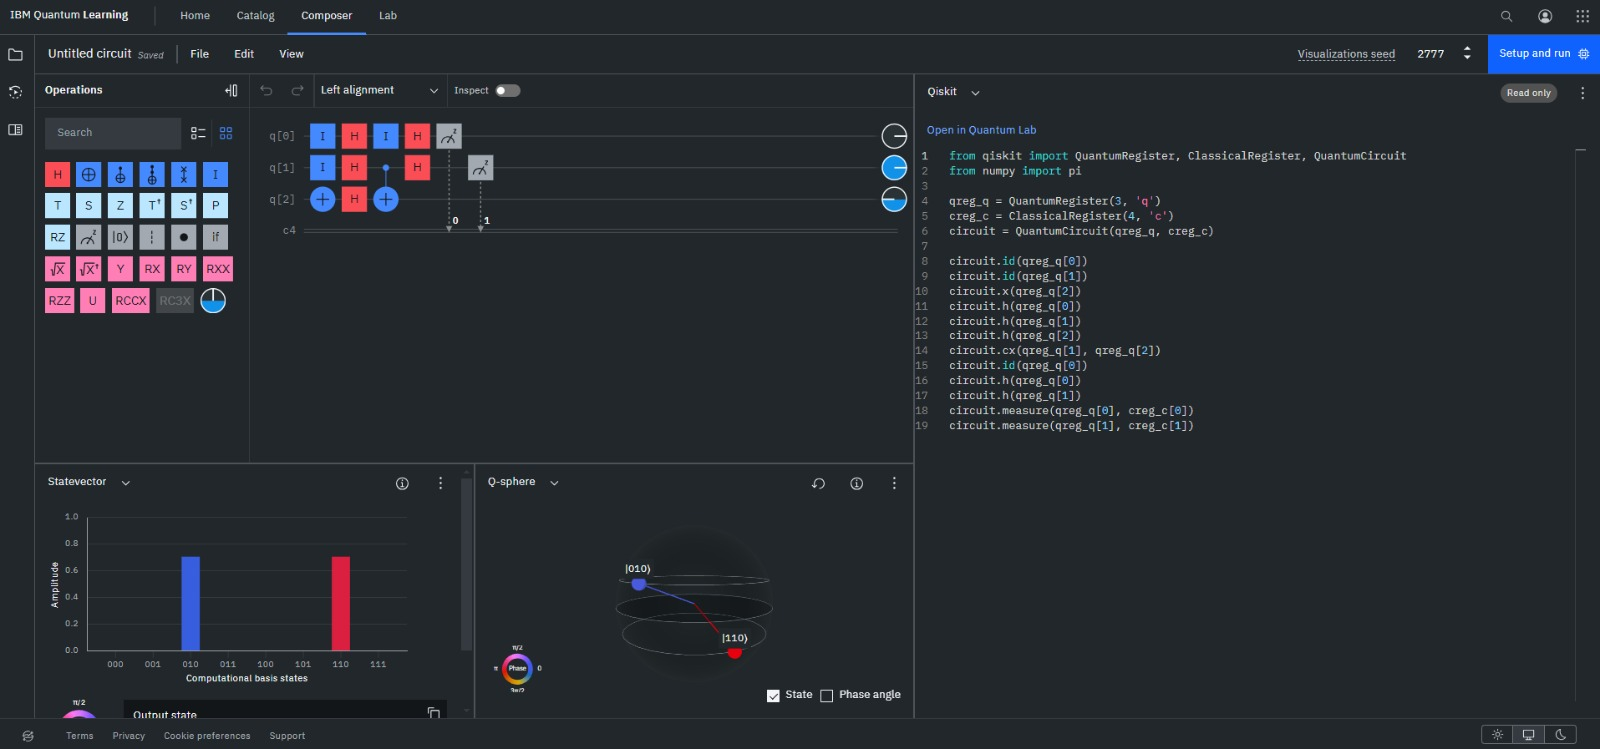

In [2]:
# Codigo del IBM (Imagen 3)
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.id(qreg_q[0])
circuit.id(qreg_q[1])
circuit.x(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[1], qreg_q[2])
circuit.id(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])